In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers = pd.read_csv(r"C:\Users\91976\Downloads\Customers.csv")
transactions = pd.read_csv(r"C:\Users\91976\Downloads\Transactions.csv")


In [3]:
# Merge datasets
customer_transactions = transactions.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    avg_transaction_value=('TotalValue', 'mean'),
    transaction_count=('TransactionID', 'count')
).reset_index()

customer_data = customers.merge(customer_transactions, on='CustomerID', how='left')
customer_data.fillna(0, inplace=True)



In [4]:
# Feature Engineering
customer_features = customer_data[['total_spent', 'avg_transaction_value', 'transaction_count']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)



In [5]:
# Clustering
num_clusters = 4 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)
customer_data['Cluster'] = kmeans.labels_



In [6]:
# Evaluate Clustering
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 1.0742466760923444


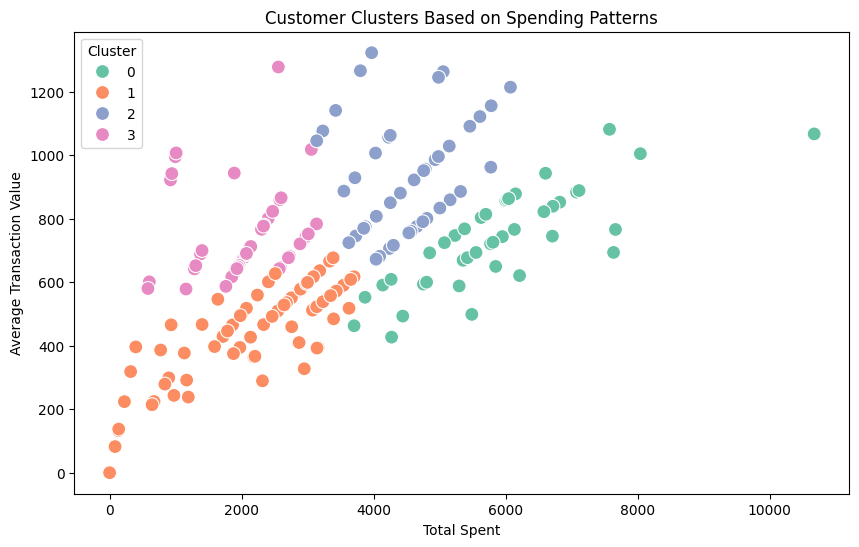

In [7]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_data['total_spent'], 
    y=customer_data['avg_transaction_value'], 
    hue=customer_data['Cluster'], 
    palette='Set2', 
    s=100
)
plt.title('Customer Clusters Based on Spending Patterns')
plt.xlabel('Total Spent')
plt.ylabel('Average Transaction Value')
plt.legend(title='Cluster')
plt.show()



In [8]:
# Save results
customer_data.to_csv('Customer_Clusters.csv', index=False)
print("Clustering results saved to 'Customer_Clusters.csv'.")

Clustering results saved to 'Customer_Clusters.csv'.
